In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from BGDRegression import BGDRegression

Load data

In [2]:
def load_data(filename, input_features, output_feature):
    file = pd.read_csv(filename)
    features = []
    for feature in input_features:
        features.append([float(value) for value in file[feature]])
    output_feature = [float(value) for value in file[output_feature]]
    return features, output_feature

Plot data

In [3]:
def plot_histogram(x, variable_name):
    plt.hist(x, 10)
    plt.title('Histogram of ' + variable_name)
    plt.show()


def plot_linearity(input_feature, output_feature, input_name, output_name):
    plt.plot(input_feature, output_feature, 'ro')
    plt.xlabel(input_name)
    plt.ylabel(output_name)
    plt.title(input_name + ' vs. ' + output_name)
    plt.show()
    
def plot_data(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if x2:
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if x3:
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_3d_data(train, y_train, model = None, y_model = None, test = None, y_test = None, title = None):
    
    ax = plt.axes(projection = '3d')
    if train:
        plt.scatter(train[0], train[1], y_train, c ='r', marker ='o', label ='train data') 
    if model:
        plt.scatter(model[0], model[1], y_model, c ='b', marker ='_', label ='learnt model') 
    if test:
        plt.scatter(test[0], test[1], y_test, c ='g', marker ='^', label ='test data')  
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

Normalise data

In [4]:
def min_max_scaling(data):
    min_vals = [min(row) for row in data]
    max_vals = [max(row) for row in data]
    
    scaled_data = []
    for row, min_val, max_val in zip(data, min_vals, max_vals):
        scaled_row = [(x - min_val) / (max_val - min_val) for x in row]
        scaled_data.append(scaled_row)
    
    return scaled_data, min_vals, max_vals

def normalisation(train_data, test_data):
    scaler = StandardScaler()
    if not isinstance(train_data[0], list):
        train_data = [[d] for d in train_data]
        test_data = [[d] for d in test_data]
        scaler.fit(train_data)
        normalised_train_data = scaler.transform(train_data)
        normalised_test_data = scaler.transform(test_data)
        normalised_train_data = [el[0] for el in normalised_train_data]
        normalised_test_data = [el[0] for el in normalised_test_data]
    else:
        scaler.fit(train_data)
        normalised_train_data = scaler.transform(train_data)
        normalised_test_data = scaler.transform(test_data)
    return scaler, normalised_train_data, normalised_test_data

Split data intro train and test

In [5]:
def train_and_test(features, result):
    np.random.seed(5)
    indexes = [i for i in range(len(result))]
    train_sample_indexes = np.random.choice(indexes, int(0.8 * len(result)), replace=False)
    validation_sample_indexes = [i for i in range(len(result)) if i not in train_sample_indexes]
    train_features = []
    validation_features = []
    for feature in features:
        train_features.append([feature[i] for i in train_sample_indexes])
        validation_features.append([feature[i] for i in validation_sample_indexes])
    train_result = [result[i] for i in train_sample_indexes]
    validation_result = [result[i] for i in validation_sample_indexes]
    return train_features, train_result, validation_features, validation_result

Plot training and validation data

In [6]:
def plot_train_and_test(train_features, train_result, validation_features, validation_result, input_name, output_name):
    plt.plot(train_features, train_result, 'ro', label='Training data')
    plt.plot(validation_features, validation_result, 'g^', label='Testing data')
    plt.xlabel(input_name)
    plt.ylabel(output_name)
    plt.title('Train and test')
    plt.legend()
    plt.show()

Learning model

In [7]:
def learning_by_tool(train_input, train_output, validation_input):
    xx = [[el] for el in train_input]
    regressor = linear_model.SGDRegressor(alpha=0.01, max_iter=1000)
    regressor.fit(xx, train_output)
    w0, w1 = regressor.intercept_[0], regressor.coef_[0]
    print('Learnt model by tool: f(x) =', w0, '+', w1, '* x')
    computed_outputs = regressor.predict([[x] for x in validation_input])
    return [w0, w1], computed_outputs


def learning_by_me(train_input, train_output, validation_input):
    xx = [[el] for el in train_input]
    regressor = BGDRegression()
    regressor.fit(xx, train_output)
    w0, w1 = regressor.intercept_, regressor.coefficient_[0]
    print('Learnt model by me: f(x) = ', w0, '+', w1, '* x')
    computed_outputs = regressor.predict([[x] for x in validation_input])
    return [w0, w1], computed_outputs

def learning_by_tool_multi_input(train_inputs, train_output, validation_inputs):
    xx = [[el1, el2] for el1, el2 in zip(*train_inputs)]
    regressor = linear_model.SGDRegressor(alpha=0.01, max_iter=1000)
    regressor.fit(xx, train_output)
    w0, w1, w2 = regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]
    print('Learnt model by tool: f(x) =', w0, '+', w1, '* x1', '+', w2, '* x2')
    computed_outputs = regressor.predict([[x, y] for x, y in zip(*validation_inputs)])
    return [w0, w1, w2], computed_outputs

def learning_by_me_multi_input(train_inputs, train_output, validation_inputs):
    xx = [[el1, el2] for el1, el2 in zip(*train_inputs)]
    regressor = BGDRegression()
    regressor.fit(xx, train_output)
    w0, w1, w2 = regressor.intercept_, regressor.coefficient_[0], regressor.coefficient_[1]
    print('Learnt model by me: f(x) = ', w0, '+', w1, '* x1', '+', w2, '* x2')
    computed_outputs = regressor.predict([[x, y] for x, y in zip(*validation_inputs)])
    return [w0, w1, w2], computed_outputs

Plot results and display performance metrics

In [8]:
def plot_results(train_inputs, train_outputs, w):
    no_of_points = 1000
    xref = []
    val = min(train_inputs)
    step = (max(train_inputs) - min(train_inputs)) / no_of_points
    for i in range(1, no_of_points):
        xref.append(val)
        val += step
    yref = [w[0] + w[1] * el for el in xref] 
    plot_data(train_inputs, train_outputs, xref, yref, [], [], title = "train data and model")
    
def calculate_metrics(test_inputs, test_outputs, computed_outputs):
    
    if len(test_inputs) == 1:
        plot_data([], [], test_inputs[0], computed_outputs, test_inputs[0], test_outputs, "predictions vs real test data")
    else:
        plot_3d_data([[], []], [], test_inputs, computed_outputs, test_inputs, test_outputs, 'predictions vs real test data')
    
    #compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computed_outputs, test_outputs):
        error += (t1 - t2) ** 2
    error = error / len(test_outputs)
    print("prediction error (manual): ", error)

    error = mean_squared_error(test_outputs, computed_outputs)
    print("prediction error (tool): ", error)
    
def plot_results_3d(train_inputs, train_outputs, w):
    no_of_points = 50
    xref1 = []
    val = min(train_inputs[0])
    step1 = (max(train_inputs[0]) - min(train_inputs[0])) / no_of_points
    for _ in range(1, no_of_points):
        for _ in range(1, no_of_points):
            xref1.append(val)
        val += step1

    xref2 = []
    val = min(train_inputs[1])
    step2 = (max(train_inputs[1]) - min(train_inputs[1])) / no_of_points
    for _ in range(1, no_of_points):
        aux = val
        for _ in range(1, no_of_points):
            xref2.append(aux)
            aux += step2
    yref = [w[0] + w[1] * el1 + w[2] * el2 for el1, el2 in zip(xref1, xref2)]
    plot_3d_data(train_inputs, train_outputs, [xref1, xref2], yref, [[], []], [], 'train data and the learnt model')

Load data for ex2 and ex3

In [9]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
from MyLogisticRegression import MyLogisticRegression
from MyLogisticRegression import sigmoid
from sklearn.linear_model import SGDClassifier
from MyLogisticRegressionMultiOutput import MyLogisticRegressionMultiOutputs
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable


In [10]:
def load_breast_cancer():
    breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
      
    features = breast_cancer_wisconsin_diagnostic.data.features 
    outputs = breast_cancer_wisconsin_diagnostic.data.targets
    feature1 = [float((x + y + z) / 3) for x, y, z in zip(features['radius1'], features['radius2'], features['radius3'])]
    feature2 = [float((x + y + z) / 3) for x, y, z in zip(features['texture1'], features['texture2'], features['texture3'])]
    inputs = [[x, y] for x, y in zip(feature1, feature2)]
    outputs = [1 if el == 'B' else 0 for el in outputs['Diagnosis']]
    
    return inputs, outputs, ['malign', 'benign'], feature1, feature2, ['radius', 'texture']

def load_data_flowers():
    iris = fetch_ucirepo(id=53) 
  
     
    features = iris.data.features 
    outputs = iris.data.targets
    feature1 = [float(x) for x in features['sepal length']]
    feature2 = [float(x) for x in features['sepal width']]
    feature3 = [float(x) for x in features['petal length']]
    feature4 = [float(x) for x in features['petal width']]
    inputs = [[x, y, z, v] for x, y, z, v in zip(feature1, feature2, feature3, feature4)]
    outputs = [el for el in outputs['class']]
  
    return inputs, outputs, ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], feature1, feature2, feature3, feature4, features.columns

Plot data for ex2 and ex3

In [11]:
def plot_data2(inputs, outputs, output_names, feature_names, title=None):
    labels = set(outputs)
    no_data = len(inputs)
    for crt_label in labels:
        x = [inputs[i][0] for i in range(no_data) if outputs[i] == crt_label]
        y = [inputs[i][1] for i in range(no_data) if outputs[i] == crt_label]
        plt.scatter(x, y, label=output_names[crt_label])
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.title(title)
    plt.show()
    
def plot_data_four_features(inputs, outputs, output_names, feature_names, title=None):
    x = [i[0] for i in inputs]
    y = [i[1] for i in inputs]
    z = [i[2] for i in inputs]
    v = [i[3] for i in inputs]
    figure = px.scatter_3d(x=x, y=y, z=z, symbol=v, color=outputs, title=title,
                           labels=dict(x=feature_names[0], y=feature_names[1], z=feature_names[2],
                                       symbol=feature_names[3], color="Type"))
    figure.update_layout(legend=dict(orientation="v", yanchor='top', xanchor="right"))
    figure.show()


def plot_histogram_feature(feature, variable_name):
    plt.hist(feature, 10)
    plt.title('Histogram of ' + variable_name)
    plt.show()

Split data into train and test for ex2 and ex3

In [12]:
def train_and_test2(inputs, outputs):
    indexes = [i for i in range(len(inputs))]
    train_sample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    test_sample = [i for i in indexes if i not in train_sample]
    train_inputs = [inputs[i] for i in train_sample]
    train_outputs = [outputs[i] for i in train_sample]
    test_inputs = [inputs[i] for i in test_sample]
    test_outputs = [outputs[i] for i in test_sample]
    return train_inputs, train_outputs, test_inputs, test_outputs

Learn model for ex2 and ex3

In [13]:
def learn_by_tool(train_inputs, train_outputs, test_inputs, test_outputs, scaler):
    classifier = linear_model.LogisticRegression()
    classifier.fit(train_inputs, train_outputs)
    w0, w1, w2 = classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1]
    print('Classification model by tool: y =', w0, '+', w1, '* feat1 +', w2, '* feat2')
    computed_outputs = classifier.predict(test_inputs)
    print("Accuracy score:", classifier.score(test_inputs, test_outputs))
    print("Prediction for Texture = 10, Radius = 18: ", 'malign' if classifier.predict(scaler.transform([[18, 10]])) == 1 else 'benign')
    return computed_outputs


def learn_by_me(train_inputs, train_outputs, test_inputs, test_outputs, scaler):
    classifier = MyLogisticRegression()
    classifier.fit(train_inputs, train_outputs)
    plt.plot(classifier.loss, [index for index in range(len(classifier.loss))])
    plt.show()
    w0, w1, w2 = classifier.intercept_, classifier.coefficient_[0], classifier.coefficient_[1]
    print('Classification model by me: y =', w0, '+', w1, '* feat1 +', w2, '* feat2')
    computed_outputs = [1 if sigmoid(w0 + w1 * el[0] + w2 * el[1]) > 0.5 else 0 for el in test_inputs]
    no_data = len(test_inputs)
    accuracy = 0.0
    for i in range(no_data):
        if test_outputs[i] == computed_outputs[i]:
            accuracy += 1
    print("Accuracy score:", accuracy / no_data)
    print("Prediction for Texture = 10, Radius = 18: ", 'malign' if classifier.predict(scaler.transform([[18, 10]])) == 1 else 'benign')
    return computed_outputs

def learn_by_tool_multi_output(train_inputs, train_outputs, test_inputs, test_outputs, scaler):
    train_outputs = [0 if el == 'Iris-setosa' else 1 if el == 'Iris-virginica' else 2 for el in train_outputs]
    test_outputs = [0 if el == 'Iris-setosa' else 1 if el == 'Iris-virginica' else 2 for el in test_outputs]
    classifier = linear_model.LogisticRegression()
    classifier.fit(train_inputs, train_outputs)
    w0, w1, w2, w3, w4 = classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1], classifier.coef_[0][
        2], classifier.coef_[0][3]
    print('Classification model by tool first label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',
          w4, '* feat4')
    w0, w1, w2, w3, w4 = classifier.intercept_[1], classifier.coef_[1][0], classifier.coef_[1][1], classifier.coef_[1][
        2], classifier.coef_[1][3]
    print('Classification model by tool second label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',
          w4, '* feat4')
    w0, w1, w2, w3, w4 = classifier.intercept_[2], classifier.coef_[2][0], classifier.coef_[2][1], classifier.coef_[2][
        2], classifier.coef_[2][3]
    print('Classification model by tool third label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',
          w4, '* feat4')
    computed_outputs = classifier.predict(test_inputs)
    print("Accuracy score:", classifier.score(test_inputs, test_outputs))
    prediction = classifier.predict(scaler.transform([[5.35, 3.85, 1.25, 0.4]]))
    print("Prediction for sepal length = 5.35, sepal width = 3.85, petal length = 1.25, petal width = 0.4: ", 'Iris-setosa' if prediction == 0 else 'Iris-virginica' if prediction == 1 else 'Iris-versicolor')
    return computed_outputs

def learn_by_me_multi_output(train_inputs, train_outputs, test_inputs, test_outputs, classes, scaler):
    classifier = MyLogisticRegressionMultiOutputs(classes)
    classifier.fit(train_inputs, train_outputs)
    for name in classes:
        w0, w1, w2, w3, w4 = classifier.intercept_[name], classifier.coefficient_[name][0], classifier.coefficient_[name][1], classifier.coefficient_[name][2], classifier.coefficient_[name][3]
        print('Classification model by me ' + name + ' label: y =', w0, '+', w1, '* feat1 +', w2, '* feat2 +', w3, '* feat3 +',w4, '* feat4')
    computed_outputs = classifier.predict(test_inputs)
    no_data = len(test_inputs)
    accuracy = 0.0
    for i in range(no_data):
        if test_outputs[i] == computed_outputs[i]:
            accuracy += 1
    print("Accuracy score:", accuracy / no_data)
    print("Prediction for sepal length = 5.35, sepal width = 3.85, petal length = 1.25, petal width = 0.4: ", classifier.predict(scaler.transform([[5.35, 3.85, 1.25, 0.4]])))
    return computed_outputs

Plot predictions and display performance metrics

In [14]:
def plot_predictions(inputs, real_outputs, computed_outputs, label_names, feature_names, title=None):
    labels = list(set(real_outputs))
    no_data = len(inputs)
    for crt_label in labels:
        x = [inputs[i][0] for i in range(no_data) if real_outputs[i] == crt_label and computed_outputs[i] == crt_label]
        y = [inputs[i][1] for i in range(no_data) if real_outputs[i] == crt_label and computed_outputs[i] == crt_label]
        if type(crt_label) == str:
            plt.scatter(x, y, label=crt_label + ' (correct)')
        else:
            plt.scatter(x, y, label=label_names[crt_label] + ' (correct)')
    for crt_label in labels:
        x = [inputs[i][0] for i in range(no_data) if real_outputs[i] == crt_label and computed_outputs[i] != crt_label]
        y = [inputs[i][1] for i in range(no_data) if real_outputs[i] == crt_label and computed_outputs[i] != crt_label]
        if type(crt_label) == str:
            plt.scatter(x, y, label=crt_label + ' (incorrect)')
        else:
            plt.scatter(x, y, label=label_names[crt_label] + ' (incorrect)')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.legend()
    plt.show()


def calculate_performance(computed_outputs, test_outputs, method):
    error = 0.0
    for t1, t2 in zip(computed_outputs, test_outputs):
        if t1 != t2:
            error += 1
    error = error / len(test_outputs)
    print('Classification error by', method, ':', error)

Optional exercises

In [15]:
def cross_validation(inputs, outputs):
    indexes = [i for i in range(len(inputs))]
    first_set_index = []
    second_set_index = []
    third_set_index = []
    forth_set_index = []
    fifth_set_index = []
    for i in range(5):
        first_set_index = np.random.choice(indexes, int(0.2 * len(inputs)), replace=False)
        used = list(first_set_index)
        second_set_index = np.random.choice([i for i in indexes if i not in used], int(0.2 * len(inputs)),
                                            replace=False)
        used += list(second_set_index)
        third_set_index = np.random.choice([i for i in indexes if i not in used], int(0.20 * len(inputs)),
                                           replace=False)
        used += list(third_set_index)
        forth_set_index = np.random.choice([i for i in indexes if i not in used], int(0.20 * len(inputs)),
                                           replace=False)
        used += list(forth_set_index)
        fifth_set_index = [i for i in indexes if i not in used]
    first_set = {
        'inputs': [inputs[i] for i in first_set_index],
        'outputs': [outputs[i] for i in first_set_index]
    }
    second_set = {
        'inputs': [inputs[i] for i in second_set_index],
        'outputs': [outputs[i] for i in second_set_index]
    }
    third_set = {
        'inputs': [inputs[i] for i in third_set_index],
        'outputs': [outputs[i] for i in third_set_index]
    }
    forth_set = {
        'inputs': [inputs[i] for i in forth_set_index],
        'outputs': [outputs[i] for i in forth_set_index]
    }
    fifth_set = {
        'inputs': [inputs[i] for i in fifth_set_index],
        'outputs': [outputs[i] for i in fifth_set_index]
    }
    return [first_set, second_set, third_set, forth_set, fifth_set]


def other_loss_function(train_inputs, train_outputs, test_inputs, test_outputs):
    classifier = SGDClassifier(loss='log_loss')
    classifier.fit(train_inputs, train_outputs)
    print('Accuracy score (log loss by tool):', classifier.score(test_inputs, test_outputs))
    classifier = SGDClassifier(loss='hinge')
    classifier.fit(train_inputs, train_outputs)
    print('Accuracy score (hinge loss by tool):', classifier.score(test_inputs, test_outputs))
    classifier = SGDClassifier(loss='squared_hinge')
    classifier.fit(train_inputs, train_outputs)
    print('Accuracy score (squared hinge loss by tool):', classifier.score(test_inputs, test_outputs))

EX1

In [16]:
def ex1():
    crt_dir =  os.getcwd()
    file_path = os.path.join(crt_dir, 'data', 'world-happiness-report-2017.csv')
    print('Prediction of Happiness Score based on Economy..GDP.per.Capita.')
    inputs, outputs = load_data(file_path, ['Economy..GDP.per.Capita.'], 'Happiness.Score')
    plot_histogram(inputs[0], 'Economy..GDP.per.Capita.')
    plot_histogram(outputs, 'Happiness.Score')
    plot_linearity(inputs[0], outputs, 'Economy..GDP.per.Capita.', 'Happiness.Score')
    train_inputs, train_outputs, test_inputs, test_outputs = train_and_test(inputs, outputs)
    plot_data(train_inputs[0], train_outputs, [], [], test_inputs[0], test_outputs, "train and test data")
    w, computed_outputs = learning_by_tool(train_inputs[0], train_outputs, test_inputs[0])
    plot_results(train_inputs[0], train_outputs, w)
    calculate_metrics(test_inputs, test_outputs, computed_outputs)
    
    # print("Prediction of Happiness Score based on Economy..GDP.per.Capita. and Freedom")
    # inputs, outputs = load_data(file_path, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')
    # plot_histogram(inputs[0], 'Economy..GDP.per.Capita.')
    # plot_histogram(inputs[1], 'Freedom')
    # plot_histogram(outputs, 'Happiness.Score')
    # plot_3d_data(inputs, outputs, [[], []], [], [[], []], [], 'capita vs freedom vs happiness')
    # train_inputs, train_outputs, test_inputs, test_outputs = train_and_test(inputs, outputs)
    # normalised_train_inputs, _, _ = min_max_scaling(train_inputs)
    # normalised_test_inputs, _, _ = min_max_scaling(test_inputs)
    # plot_3d_data(normalised_train_inputs, train_outputs, [[], []], [], normalised_test_inputs, test_outputs, "train and test data (after normalisation)")
    # # w, computed_outputs = learning_by_tool_multi_input(train_inputs, train_outputs, test_inputs)
    # w, computed_outputs = learning_by_me_multi_input(train_inputs, train_outputs, test_inputs)
    # plot_results_3d(normalised_train_inputs, train_outputs, w)
    # calculate_metrics(normalised_test_inputs, test_outputs, computed_outputs)
    

EX2

In [17]:
def ex2():
    print("Two classes:")
    inputs, outputs, output_names, feature1, feature2, feature_names = load_breast_cancer()
    plot_data2(inputs, outputs, output_names, feature_names, "Initial data")
    plot_histogram_feature(feature1, feature_names[0])
    plot_histogram_feature(feature2, feature_names[1])
    plot_histogram_feature(outputs, 'Cancer class')
    train_inputs, train_outputs, test_inputs, test_outputs = train_and_test2(inputs, outputs)
    scaler, train_inputs, test_inputs = normalisation(train_inputs, test_inputs)
    plot_data2(train_inputs, train_outputs, output_names, feature_names, "Normalised data")
    computed_test_outputs = learn_by_tool(train_inputs, train_outputs, test_inputs, test_outputs, scaler)
    plot_predictions(test_inputs, test_outputs, computed_test_outputs, output_names, feature_names, "Results by tool")
    calculate_performance(computed_test_outputs, test_outputs, "tool")
    print()
    computed_test_outputs = learn_by_me(train_inputs, train_outputs, test_inputs, test_outputs, scaler)
    plot_predictions(test_inputs, test_outputs, computed_test_outputs, output_names, feature_names, "Results by me")
    calculate_performance(computed_test_outputs, test_outputs, "me")

EX3

In [18]:
def ex3():
    inputs, outputs, output_names, feature1, feature2, feature3, feature4, feature_names = load_data_flowers()
    # plot_data_four_features(inputs, outputs, output_names, feature_names, "Initial data for flowers")
    plot_histogram_feature(feature1, feature_names[0])
    plot_histogram_feature(feature2, feature_names[1])
    plot_histogram_feature(feature3, feature_names[2])
    plot_histogram_feature(feature4, feature_names[3])
    plot_histogram_feature(outputs, 'Flowers class')
    train_inputs, train_outputs, test_inputs, test_outputs = train_and_test2(inputs, outputs)
    scaler, train_inputs, test_inputs = normalisation(train_inputs, test_inputs)
    # plot_data_four_features(train_inputs, train_outputs, output_names, feature_names, "Normalised flowers' data")
    computed_test_outputs = learn_by_tool_multi_output(train_inputs, train_outputs, test_inputs, test_outputs, scaler)
    plot_predictions(test_inputs, test_outputs, computed_test_outputs, output_names, feature_names[:2], "Results by tool")
    calculate_performance(computed_test_outputs, test_outputs, "tool")
    print()
    computed_test_outputs = learn_by_me_multi_output(train_inputs, train_outputs, test_inputs, test_outputs, output_names, scaler)
    plot_predictions(test_inputs, test_outputs, computed_test_outputs, output_names, feature_names[:2], "Results by me")
    calculate_performance(computed_test_outputs, test_outputs, "me")
    print()
    print("Cross validation:")
    data = cross_validation(inputs, outputs)
    for index in range(5):
        test_inputs = data[index]['inputs']
        test_outputs = data[index]['outputs']
        train_inputs = []
        train_outputs = []
        for dictionary in data[:index] + data[index + 1:]:
            train_inputs += dictionary['inputs']
            train_outputs += dictionary['outputs']
        scaler, train_inputs, test_inputs = normalisation(train_inputs, test_inputs)
        computed_test_outputs = learn_by_me_multi_output(train_inputs, train_outputs, test_inputs, test_outputs, output_names, scaler)
        calculate_performance(computed_test_outputs, test_outputs, "me")
        print()
    print("Other loss functions:")
    train_inputs, train_outputs, test_inputs, test_outputs = train_and_test2(inputs, outputs)
    _, train_inputs, test_inputs = normalisation(train_inputs, test_inputs)
    other_loss_function(train_inputs, train_outputs, test_inputs, test_outputs)


Main

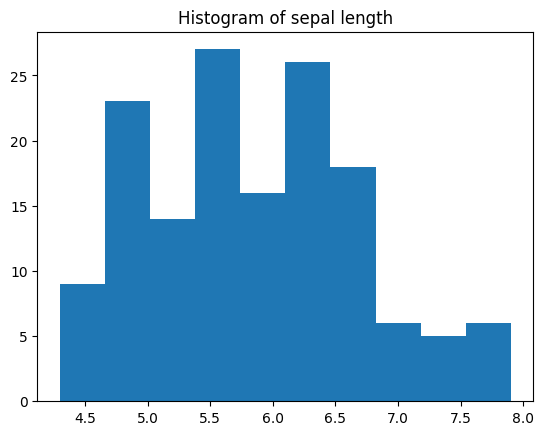

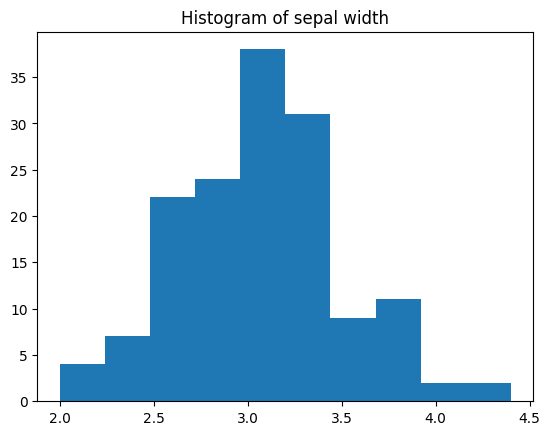

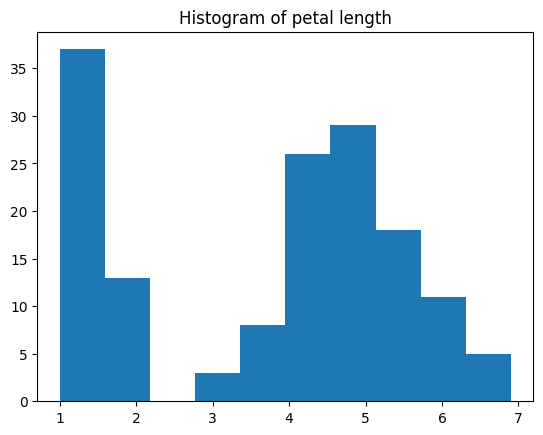

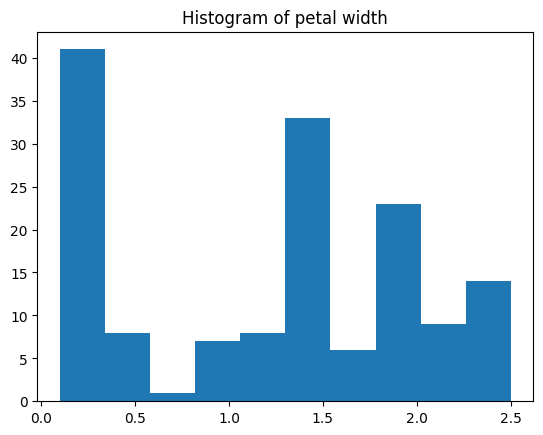

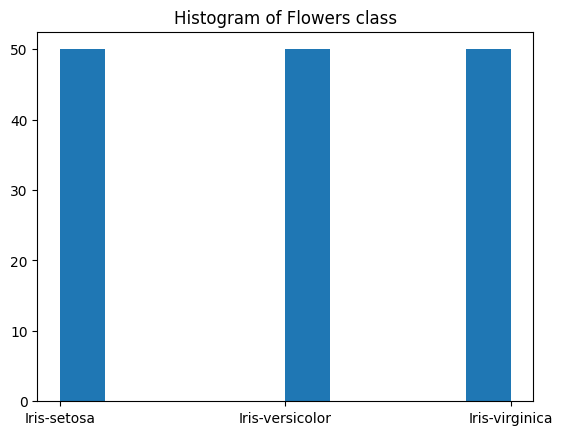

Classification model by tool first label: y = -0.07801863507047575 + -1.0467874066471285 * feat1 + 1.003540730538458 * feat2 + -1.8073858478131104 * feat3 + -1.7143570873267129 * feat4
Classification model by tool second label: y = -1.9820165569339017 + 0.5580236882949966 * feat1 + -0.5579532913600392 * feat2 + 2.167582445243634 * feat3 + 2.301550202684894 * feat4
Classification model by tool third label: y = 2.060035192004375 + 0.48876371835213184 * feat1 + -0.44558743917841886 * feat2 + -0.3601965974305236 * feat3 + -0.5871931153581806 * feat4
Accuracy score: 0.9
Prediction for sepal length = 5.35, sepal width = 3.85, petal length = 1.25, petal width = 0.4:  Iris-setosa


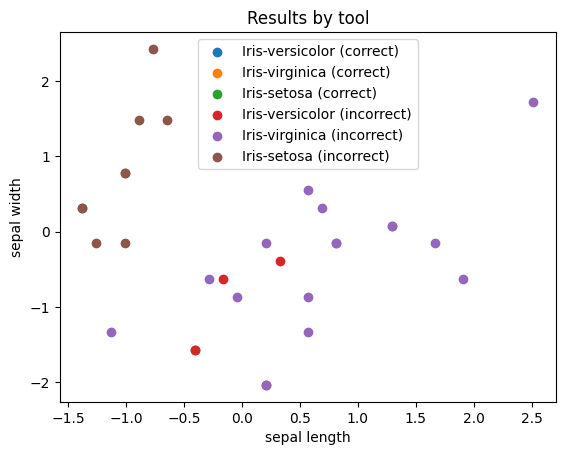

Classification error by tool : 1.0

Classification model by me Iris-setosa label: y = -1.9930120585029063 + -1.247139482882994 * feat1 + 1.9400341569899704 * feat2 + -2.2980873708061376 * feat3 + -1.7916858053133078 * feat4
Classification model by me Iris-virginica label: y = -3.726301468628718 + 0.10876182810125976 * feat1 + 0.0020095173338776987 * feat2 + 2.1780195808991953 * feat3 + 3.1082839848773385 * feat4
Classification model by me Iris-versicolor label: y = -0.7649718862468766 + 0.12417639548279276 * feat1 + -1.4389157666380228 * feat2 + 0.8095747309621688 * feat3 + -0.8090986187301853 * feat4
Accuracy score: 0.9
Prediction for sepal length = 5.35, sepal width = 3.85, petal length = 1.25, petal width = 0.4:  ['Iris-setosa']


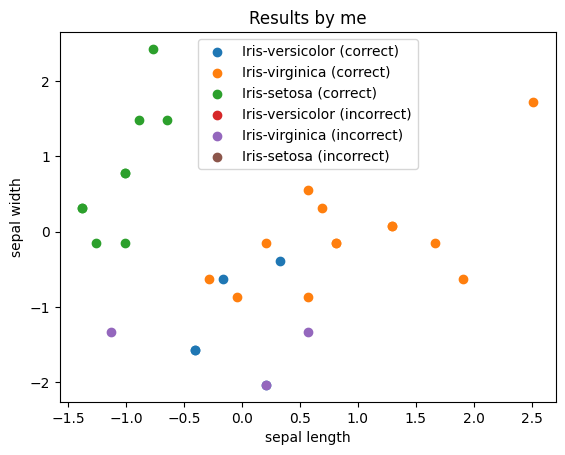

Classification error by me : 0.1

Cross validation:
Classification model by me Iris-setosa label: y = -2.212790707411959 + -1.4432811382730377 * feat1 + 1.96227903340614 * feat2 + -1.8917572310802444 * feat3 + -1.9874872986952403 * feat4
Classification model by me Iris-virginica label: y = -3.2510724869896257 + -0.1607841651651757 * feat1 + -0.19413030880317686 * feat2 + 2.6375866414148215 * feat3 + 3.393267633919416 * feat4
Classification model by me Iris-versicolor label: y = -1.0205158546764477 + 0.17445376112712882 * feat1 + -1.240170774556622 * feat2 + 1.0140065417728963 * feat3 + -1.1876581212704582 * feat4
Accuracy score: 0.9
Prediction for sepal length = 5.35, sepal width = 3.85, petal length = 1.25, petal width = 0.4:  ['Iris-setosa']
Classification error by me : 0.1

Classification model by me Iris-setosa label: y = -1.9054197896959977 + -1.3939408263296145 * feat1 + 1.846385501227332 * feat2 + -2.223095391777971 * feat3 + -1.817994195237571 * feat4
Classification model by me

In [19]:
# %matplotlib notebook
# ex1()
# ex2()
ex3()